# EDA (Exploratory Data Analysis)

1. load datasets

2. clean data (missing values, duplicates, types)

3. treat outliers

4. Univariate & bivariate & multivariate analysis

5. insights

### Outlier - 
         
        a data point that is significantly different from other observations in a dataset. 

How outliers will come ---?

1.Measurement errors

2.data entry mistakes


Why they are important ---?

1.They can be errors

2.They effect the data analysis


How to identify the outliers ---?

1.Statistical methods

  ----> Interquartile Range (IQR)

  ----> Z-score


2.visualization techniques

  ----> Box plots

  ----> Scatter Plots 

  ----> Histogram

### Univariate analysis - 

     a method that analyzes a single variable to describe its characteristics, find patterns and summarize the data.

#### It involves only one variable.


### Bivariate analysis -
     
     it will give relationship between 2 variables. It helps to find if there is an co-relation, association or connection between 2 variables.

#### It involves 2 variables (x & y)


### Multivariate analysis - 

     To understand how multiple factors interact & influence each other.

#### It involves more than 2



## ETL


## ELT


## EDA : <Dataset>

1. load & overview

2. cleaning (missing, dups, dtypes)

3. uni, bi, multi var analysis

4. treat Outliers - IQR

5. Feature Engineering

6. key insights

### Feature Engineering - 
      
      It is the process of turning raw data into useful features that helps to improve the performance of the machine learning models.

1. load libraries & Datasets

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 

In [18]:
df = sns.load_dataset("titanic")
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [4]:
# Basic Information and overview of the dataset
print("Shape of the dataset",df.shape)
print(df.info())
print(df.describe())

Shape of the dataset (891, 15)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB
None
         survived      pclass         age  

In [10]:
# Missing values analysis
missing = pd.DataFrame({
    'missing_count': df.isnull().sum(),
    'missing_percentage': df.isnull().mean() * 100
})
missing.sort_values(by='missing_percentage', ascending=False, inplace=True)

print(missing)

             missing_count  missing_percentage
deck                   688           77.216611
age                    177           19.865320
embarked                 2            0.224467
embark_town              2            0.224467
sex                      0            0.000000
pclass                   0            0.000000
survived                 0            0.000000
fare                     0            0.000000
parch                    0            0.000000
sibsp                    0            0.000000
class                    0            0.000000
adult_male               0            0.000000
who                      0            0.000000
alive                    0            0.000000
alone                    0            0.000000


In [19]:
#Handling missing values

# fill numerical missing values with mean
df['age'] = df['age'].fillna(df['age'].mean())

# fill categorial missing values with mode
df['embarked'] = df['embarked'].fillna(df['embarked'].mode()[0])  

# Drop columns with too many missing values
df=df.drop(columns=['deck'])

print("Missing values after cleaning : ", df.isnull().sum().sum())


Missing values after cleaning :  2


In [21]:
print("Duplicate rows : ", df.duplicated().sum())
df['class'] = df['class'].astype('category')
df['sex'] = df['sex'].astype('category')
df['embarked'] = df['embarked'].astype('category')

df.info()

Duplicate rows :  111
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    category
 3   age          891 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     891 non-null    category
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  embark_town  889 non-null    object  
 12  alive        891 non-null    object  
 13  alone        891 non-null    bool    
dtypes: bool(2), category(3), float64(2), int64(4), object(3)
memory usage: 67.5+ KB


### 6. Univariate analysis for numerical features

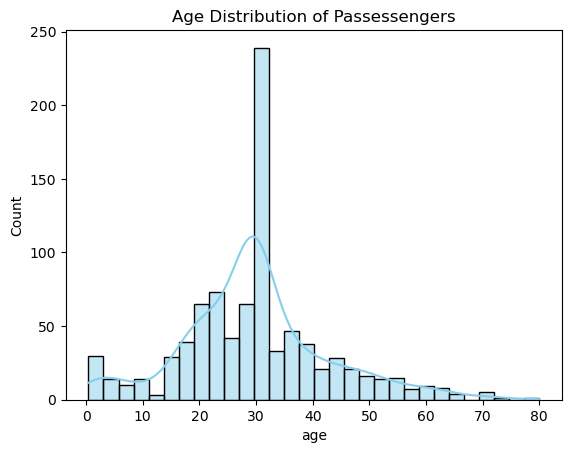

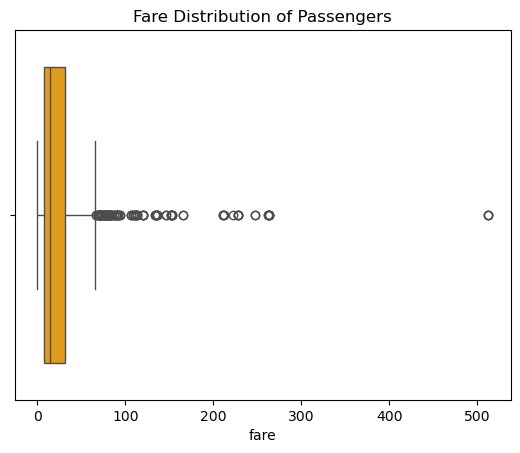

In [22]:
# univariate analysis for numerical features

num_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[num_cols].describe()

# Histogram 
sns.histplot(df['age'], kde=True,color='skyblue')
plt.title('Age Distribution of Passessengers')
plt.show()

sns.boxplot(x=df['fare'], color='orange')
plt.title("Fare Distribution of Passengers")
plt.show()

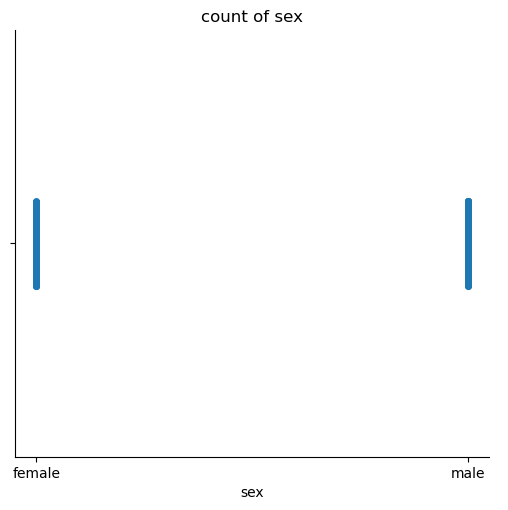

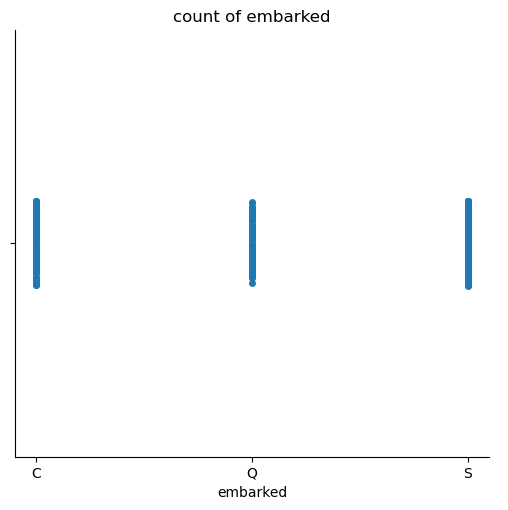

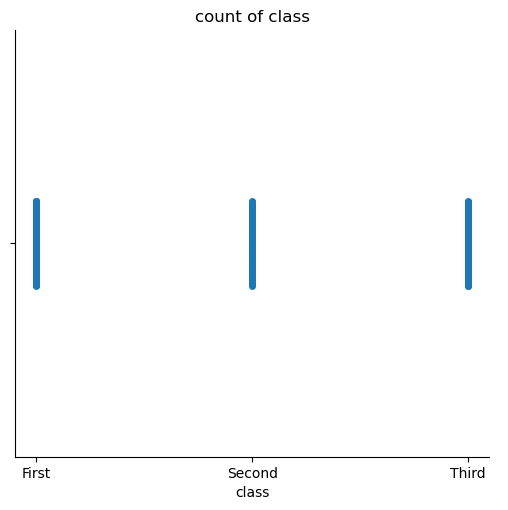

In [24]:
cat_cols = df.select_dtypes(include=['category']).columns

for col in cat_cols:
    sns.catplot(x=col, data=df)
    plt.title(f'count of {col}')
    plt.show()

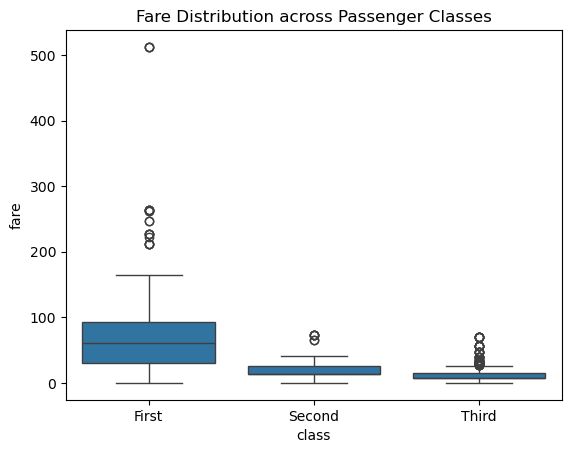

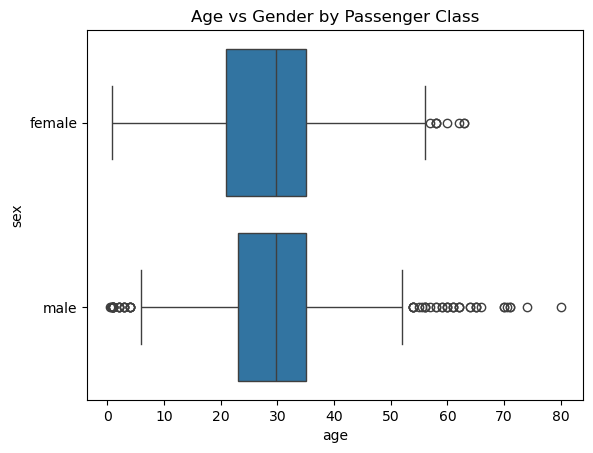

In [30]:
# bivariate analysis for numerical features

sns.boxplot(x='class', y='fare', data=df)
plt.title('Fare Distribution across Passenger Classes')
plt.show()

sns.boxplot(x='age', y='sex', data=df)
plt.title('Age vs Gender by Passenger Class')
plt.show()


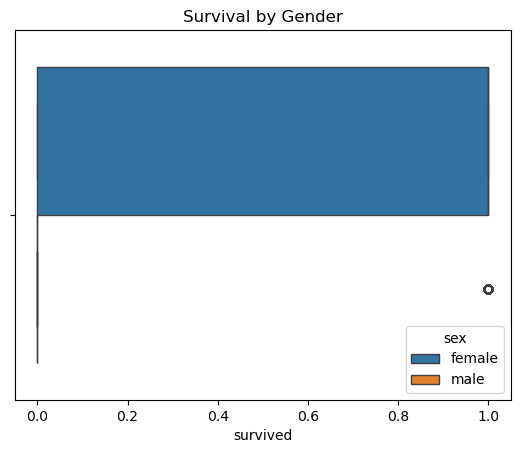

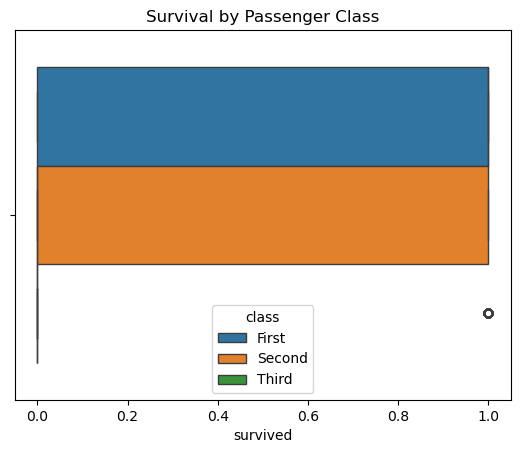

In [31]:
sns.boxplot(x='survived', hue='sex', data=df)
plt.title('Survival by Gender')
plt.show()

sns.boxplot(x='survived', hue='class', data=df)
plt.title('Survival by Passenger Class')
plt.show()


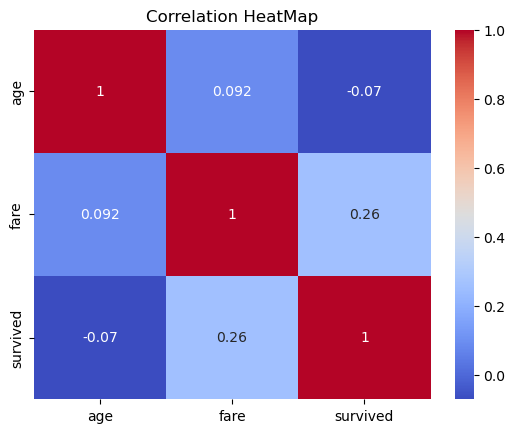

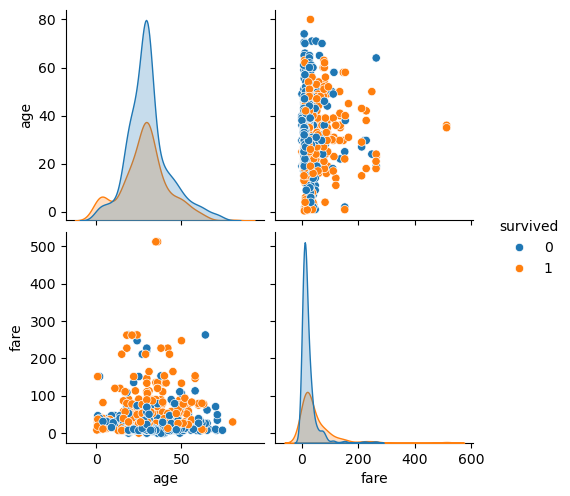

In [32]:
# corelation and multivariate analysis

corr = df[['age', 'fare', 'survived']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation HeatMap')
plt.show()

sns.pairplot(df[['age', 'fare', 'survived']], hue='survived')
plt.show()

Insights : 

1. Fare has a positive correlation with survival

2. Age shows a slight negative correlation with survival

Number of outliers in fare :  891


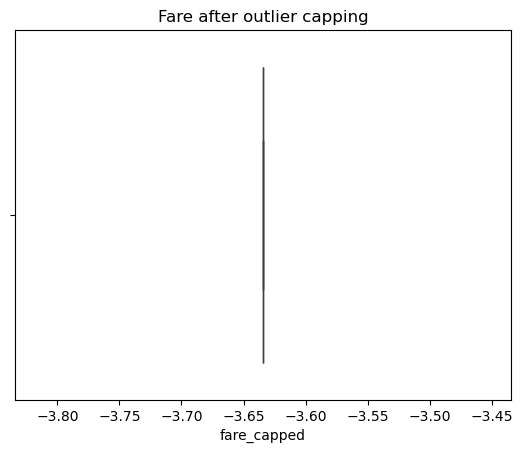

In [34]:
# outlier detection using IQR

Q1=df['fare'].quantile(0.25)
Q3=df['fare'].quantile(0.75)
IQR=Q3-Q1 

lower=Q1 - 1.5 * IQR 
upper= Q3- 1.5 * IQR 

outliers=df[(df['fare']<lower)|(df['fare']>upper)]
print("Number of outliers in fare : ", len(outliers))

df['fare_capped'] = df['fare'].clip(lower,upper)
sns.boxplot(x=df['fare_capped'])
plt.title("Fare after outlier capping")
plt.show()

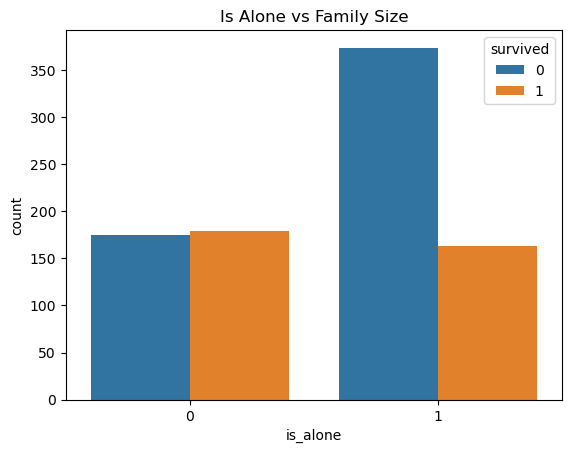

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone,fare_capped,family_size,is_alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False,-3.6344,2,0
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False,-3.6344,2,0
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True,-3.6344,1,1
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False,-3.6344,2,0
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True,-3.6344,1,1


In [38]:
# Feature Engineering

# create new features

df['family_size'] = df['sibsp'] + df['parch'] + 1

df['is_alone'] = (df['family_size']==1).astype(int)

sns.countplot(x='is_alone', hue='survived', data=df)
plt.title('Is Alone vs Family Size')
plt.show()

df.head()